In [1]:
import os
import pandas as pd

path2data="./data/"

path2labels=os.path.join(path2data,"Fovea_location.xlsx")
labels_df=pd.read_excel(path2labels,index_col="ID", engine="openpyxl")

labels_df.head()


,imgName,Fovea_X,Fovea_Y
ID,,,
1,A0001.jpg,1182.264278,1022.018842
2,A0002.jpg,967.754046,1016.946655
3,A0003.jpg,1220.206714,989.944033
4,A0004.jpg,1141.140888,1000.594955
5,A0005.jpg,1127.371832,1071.109440


In [2]:
labels_df.tail()

,imgName,Fovea_X,Fovea_Y
ID,,,
396,N0307.jpg,823.024991,690.210211
397,N0308.jpg,647.598978,795.653188
398,N0309.jpg,624.571803,755.694880
399,N0310.jpg,687.523044,830.449187
400,N0311.jpg,746.107631,759.623062


<AxesSubplot:xlabel='Fovea_X', ylabel='Fovea_Y'>

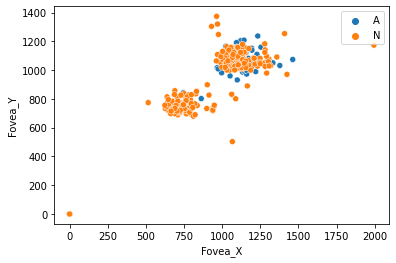

In [3]:
import seaborn as sns
%matplotlib inline

AorN=[imn[0] for imn in labels_df.imgName]
sns.scatterplot(x=labels_df['Fovea_X'], y=labels_df['Fovea_Y'],hue=AorN)

In [4]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pylab as plt

# fix random seed
np.random.seed(2019)

In [5]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.subplots_adjust(wspace=0, hspace=0.3)
nrows,ncols=2,3

<Figure size 1080x648 with 0 Axes>

In [6]:
imgName=labels_df["imgName"]
ids=labels_df.index
rndIds=np.random.choice(ids,nrows*ncols)
print(rndIds)

[ 73 371 160 294 217 191]


In [7]:
def load_img_label(labels_df,id_):
    imgName=labels_df["imgName"]
    if imgName[id_][0]=="A":
        prefix="AMD"
    else:
        prefix="Non-AMD"
    fullPath2img=os.path.join(path2data,"Training400",prefix,imgName[id_])
    img = Image.open(fullPath2img)
    x=labels_df["Fovea_X"][id_]
    y=labels_df["Fovea_Y"][id_]
    label=(x,y)
    return img,label

In [8]:
def show_img_label(img,label,w_h=(50,50),thickness=2):
    w,h = w_h
    cx,cy=label
    draw = ImageDraw.Draw(img)
    draw.rectangle(((cx-w/2, cy-h/2), (cx+w/2,cy+h/2)),outline="green",width=thickness)
    plt.imshow(np.asarray(img))

(2124, 2056) (1037.89889229694, 1115.71768088143)
(1444, 1444) (635.148992978281, 744.648850248249)
(1444, 1444) (639.360312038611, 814.762764100936)
(2124, 2056) (1122.08407442503, 1067.58829793991)
(2124, 2056) (1092.93333646222, 1055.15333296773)
(2124, 2056) (1112.50135915347, 1070.7251775623)


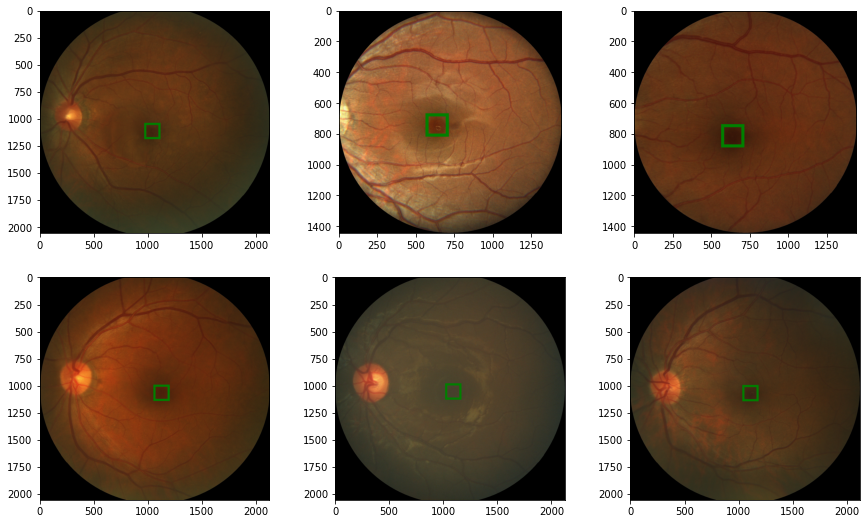

In [9]:
for i,id_ in enumerate(rndIds):
    img,label=load_img_label(labels_df,id_)
    print(img.size,label)
    plt.subplot(nrows, ncols, i+1)
    show_img_label(img,label,w_h=(150,150),thickness=20)
    #plt.title(imgName[id_])

In [20]:
h_list,w_list=[],[]
for id_ in ids:
    if imgName[id_][0]=="A":
        prefix="AMD"
    else:
        prefix="Non-AMD"
    fullPath2img=os.path.join(path2data,"Training400",prefix,imgName[id_])
    img = Image.open(fullPath2img)
    h,w=img.size
    h_list.append(h)
    w_list.append(w)

/home/konate/ml-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

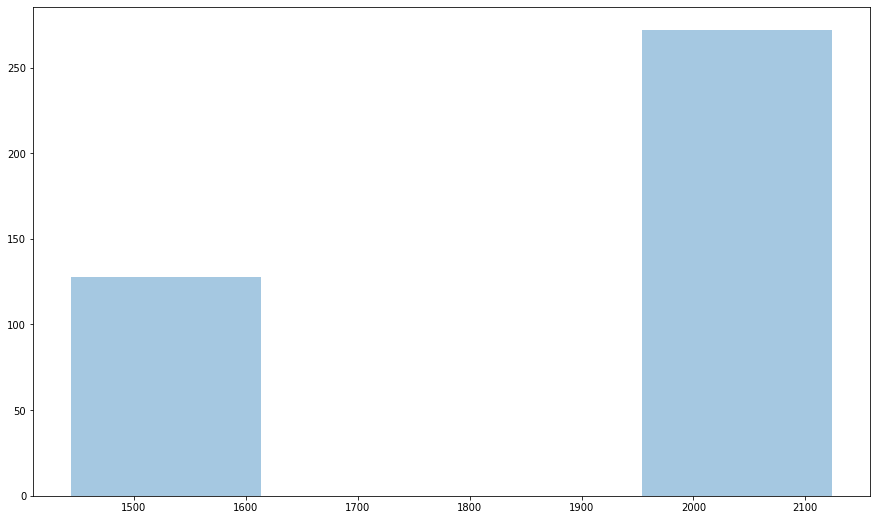

In [21]:
sns.distplot(a=h_list, kde=False)

<AxesSubplot:>

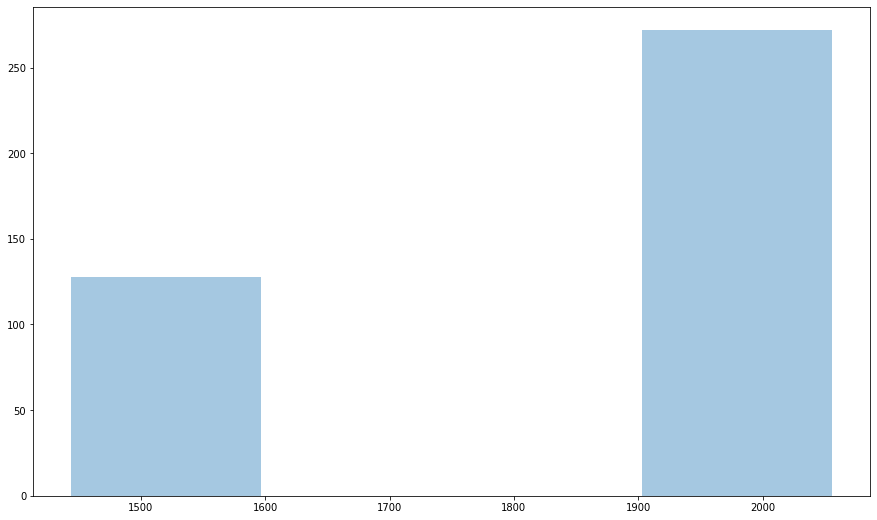

In [22]:
sns.distplot(a=w_list, kde=False)

In [23]:
import torchvision.transforms.functional as TF

def resize_img_label(image,label=(0.,0.),target_size=(256,256)):
    w_orig,h_orig = image.size
    w_target,h_target = target_size
    cx, cy = label
    image_new = TF.resize(image,target_size)
    label_new = cx/w_orig*w_target, cy/h_orig*h_target
    return image_new, label_new

(2124, 2056) (1182.26427759023, 1022.01884158854)
(256, 256) (142.4951295024006, 127.25526432230848)


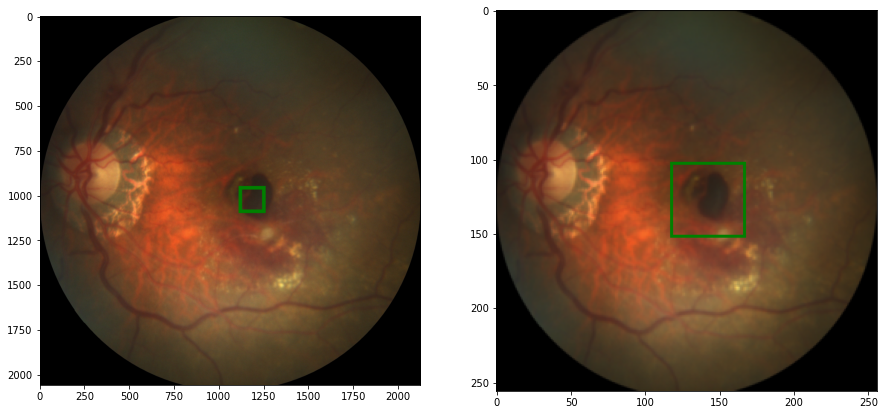

In [24]:
img, label=load_img_label(labels_df,1)
print(img.size,label)

img_r,label_r=resize_img_label(img,label)
print(img_r.size,label_r)

plt.subplot(1,2,1)
show_img_label(img,label,w_h=(150,150),thickness=20)
plt.subplot(1,2,2)
show_img_label(img_r,label_r)

In [25]:
def random_hflip(image,label):
    w,h=image.size
    x,y=label
    
    image = TF.hflip(image)
    label = w-x, y
    return image,label

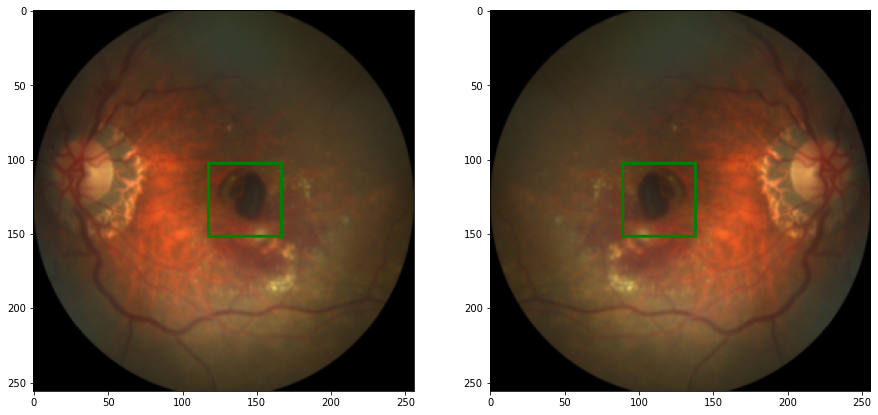

In [26]:
img, label = load_img_label(labels_df,1)
img_r, label_r = resize_img_label(img,label)
img_fh, label_fh = random_hflip(img_r,label_r)

plt.subplot(1,2,1)
show_img_label(img_r, label_r)
plt.subplot(1,2,2)
show_img_label(img_fh,label_fh)

In [27]:
def random_vflip(image,label):
    w,h=image.size
    x,y=label
    
    image = TF.vflip(image)
    label = x, w-y
    return image, label

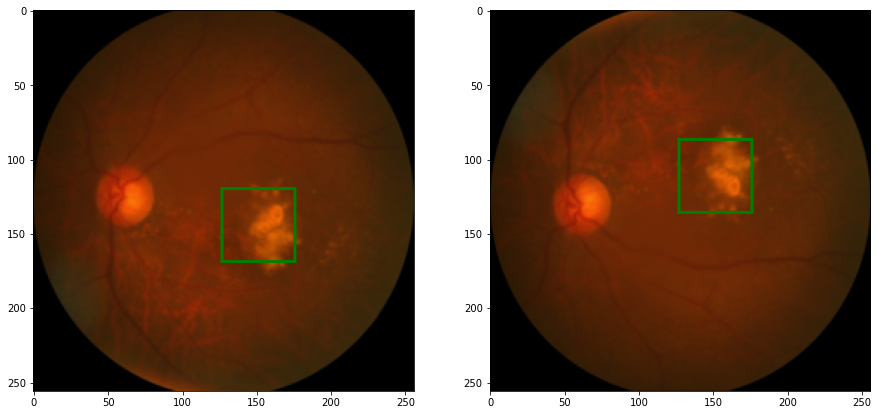

In [28]:
img, label=load_img_label(labels_df,7)
img_r, label_r=resize_img_label(img,label)
img_fv, label_fv=random_vflip(img_r,label_r)

plt.subplot(1,2,1)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
show_img_label(img_fv,label_fv)

In [29]:
import numpy as np
np.random.seed(1)

def random_shift(image,label,max_translate=(0.2,0.2)):
    w,h = image.size
    max_t_w, max_t_h=max_translate
    cx, cy=label
    trans_coef=np.random.rand()*2-1
    w_t = int(trans_coef*max_t_w*w)
    h_t = int(trans_coef*max_t_h*h)
    image=TF.affine(image,translate=(w_t,h_t),shear=0,angle=0,scale=1)
    label = cx+w_t, cy+h_t
    return image,label

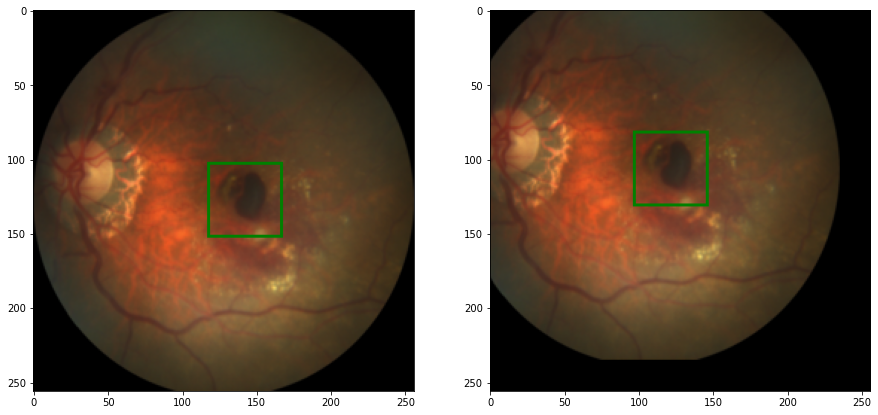

In [30]:
img, label = load_img_label(labels_df,1)
img_r, label_r = resize_img_label(img,label)
img_t, label_t = random_shift(img_r, label_r, max_translate=(.5,.5))

plt.subplot(1,2,1)
show_img_label(img_r, label_r)
plt.subplot(1,2,2)
show_img_label(img_t,label_t)

In [31]:
def transformer(image, label, params):
    image,label=resize_img_label(image,label,params["target_size"])
    
    if random.random() < params["p_hflip"]:
        image,label=random_hflip(image,label)
        
    if random.random() < params["p_vflip"]:            
        image,label=random_vflip(image,label)
        
    if random.random() < params["p_shift"]:                            
        image,label=random_shift(image,label, params["max_translate"])
        
    image=TF.to_tensor(image)
    return image, label

In [32]:
import random
np.random.seed(0)
random.seed(0)

# load image and label
img, label=load_img_label(labels_df,1)   

params={
    "target_size" : (256, 256),
    "p_hflip" : 1.0,
    "p_vflip" : 1.0,
    "p_shift" : 1.0,
    "max_translate": (0.2, 0.2),
}
img_t,label_t=transformer(img,label,params)

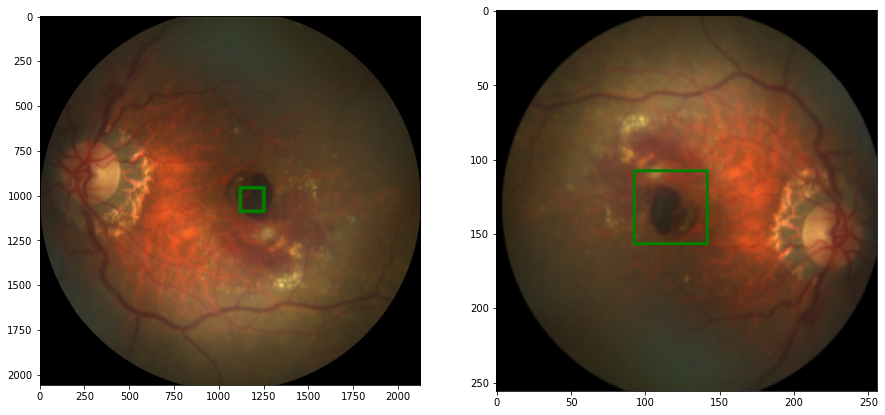

In [33]:
plt.subplot(1,2,1)
show_img_label(img,label,w_h=(150,150),thickness=20)
plt.subplot(1,2,2)
show_img_label(TF.to_pil_image(img_t),label_t)

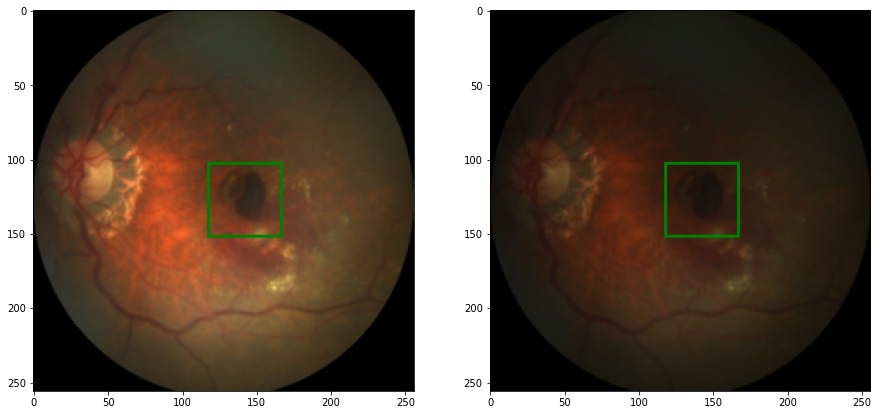

In [34]:
# load image and label
img, label = load_img_label(labels_df,1)

# resize image and label
img_r, label_r = resize_img_label(img, label)

# adjust brightness
img_t = TF.adjust_brightness(img_r, brightness_factor=0.5)
label_t = label_r

plt.subplot(1,2,1)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
show_img_label(img_t, label_t)

In [35]:
# brightness
img_t = TF.adjust_contrast(img_r, contrast_factor=0.4)

# gamma correction
img_t = TF.adjust_gamma(img_r, gamma=1.4)

In [36]:
def scale_label(a,b):
    div = [ai/bi for ai,bi in zip(a,b)]
    return div

In [37]:
def transformer(image, label, params):
    image,label=resize_img_label(image,label,params["target_size"])

    if random.random() < params["p_hflip"]:
        image,label=random_hflip(image,label)
        
    if random.random() < params["p_vflip"]:            
        image,label=random_vflip(image,label)
        
    if random.random() < params["p_shift"]:                            
        image,label=random_shift(image,label, params["max_translate"])

    if random.random() < params["p_brightness"]:
        brightness_factor=1+(np.random.rand()*2-1)*params["brightness_factor"]
        image=TF.adjust_brightness(image,brightness_factor)

    if random.random() < params["p_contrast"]:
        contrast_factor=1+(np.random.rand()*2-1)*params["contrast_factor"]
        image=TF.adjust_contrast(image,contrast_factor)

    if random.random() < params["p_gamma"]:
        gamma=1+(np.random.rand()*2-1)*params["gamma"]
        image=TF.adjust_gamma(image,gamma)

    if params["scale_label"]:
        label=scale_label(label,params["target_size"])
        
    image=TF.to_tensor(image)
    return image, label

In [38]:
np.random.seed(0)
random.seed(0)

# load image and label
img, label = load_img_label(labels_df,1)

In [39]:
params={
    "target_size" : (256, 256),
    "p_hflip" : 1.0,
    "p_vflip" : 1.0,
    "p_shift" : 1.0,
    "max_translate": (0.5, 0.5),
    "p_brightness": 1.0,
    "brightness_factor": 0.8,
    "p_contrast": 1.0,
    "contrast_factor": 0.8,
    "p_gamma": 1.0,
    "gamma": 0.4,
    "scale_label": False,
}
img_t,label_t=transformer(img,label,params)

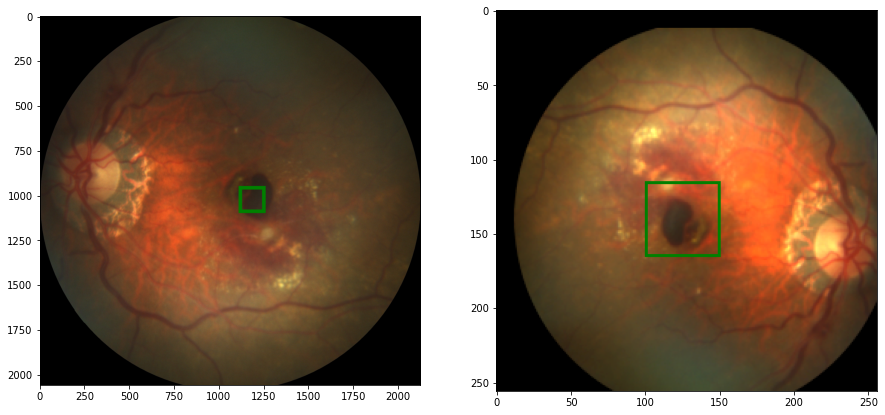

In [40]:
plt.subplot(1,2,1)
show_img_label(img,label,w_h=(150,150),thickness=20)
plt.subplot(1,2,2)
show_img_label(TF.to_pil_image(img_t),label_t)

In [41]:
def rescale_label(a,b):
    div = [ai*bi for ai,bi in zip(a,b)]
    return div

In [42]:
from torch.utils.data import Dataset
from PIL import Image

In [43]:
class AMD_dataset(Dataset):
    def __init__(self, path2data, transform, trans_params):
        pass
    def __len__(self):
        # return size of dataset
        return len(self.labels)
    def __getitem__(self, idx):
        pass

In [56]:
def __init__(self, path2data, transform, trans_params):      

    # full path of the labels file
    path2labels=os.path.join(path2data,"Fovea_location.xlsx")

    # read and extract labels
    labels_df=pd.read_excel(path2labels,index_col="ID", engine="openpyxl")
    self.labels = labels_df[["Fovea_X","Fovea_Y"]].values

    # extract ID and imgName columns
    self.imgName=labels_df["imgName"]
    self.ids=labels_df.index

    self.fullPath2img=[0]*len(self.ids)
    for id_ in self.ids:
        if self.imgName[id_][0]=="A":
            prefix="AMD"
        else:
            prefix="Non-AMD"
        self.fullPath2img[id_-1]=os.path.join(path2data,"Training400",prefix,self.imgName[id_])

    self.transform = transform
    self.trans_params=trans_params

In [57]:
def __getitem__(self, idx):
    # load PIL image
    image = Image.open(self.fullPath2img[idx])  
    label= self.labels[idx]

    # transform to tensor
    image,label = self.transform(image,label,self.trans_params)

    return image, label

In [58]:
AMD_dataset.__init__=__init__
AMD_dataset.__getitem__=__getitem__

In [59]:
trans_params_train={
    "target_size": (256,256),
    "p_hflip": 0.5,
    "p_vflip": 0.5,
    "p_shift": 0.5,
    "max_translate": (0.2, 0.2),
    "p_brightness": 0.5,
    "brightness_factor": 0.2,
    "p_contrast": 0.5,
    "contrast_factor": 0.2,
    "p_gamma": 0.5,
    "gamma": 0.2,
    "scale_label": True,
}

In [60]:
trans_params_val={
    "target_size": (256, 256),
    "p_hflip": 0.0,
    "p_vflip": 0.0,
    "p_shift": 0.0,
    "p_brightness": 0.0,
    "p_contrast": 0.0,
    "p_gamma": 0.0,
    "gamma": 0.0,
    "scale_label": True,
}

In [61]:
amd_ds1=AMD_dataset(path2data,transformer,trans_params_train)
amd_ds2=AMD_dataset(path2data,transformer, trans_params_val)

In [62]:
from sklearn.model_selection import ShuffleSplit

sss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

indices=range(len(amd_ds1))

for train_index, val_index in sss.split(indices):
    print(len(train_index))
    print("-"*10)
    print(len(val_index))

320
----------
80


In [63]:
from torch.utils.data import Subset

train_ds = Subset(amd_ds1, train_index)
print(len(train_ds))

val_ds = Subset(amd_ds2, val_index)
print(len(val_ds))

320
80


In [64]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# fix random seed
np.random.seed(0)

In [65]:
def show(img, label=None):
    npimg = img.numpy().transpose((1,2,0))
    plt.imshow(npimg)
    if label is not None:
        label = rescale_label(label, img.shape[1:])
        x,y = label
        plt.plot(x,y, 'b+', markersize=20)

[0.32861281533595366, 0.3543656084853885]


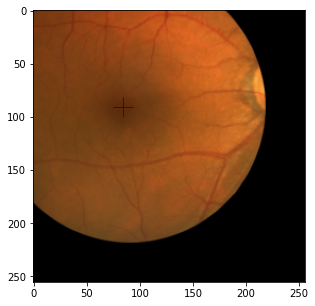

In [120]:
plt.figure(figsize=(5,5))
for img,label in train_ds:
    print(label)
    show(img,label)
    break

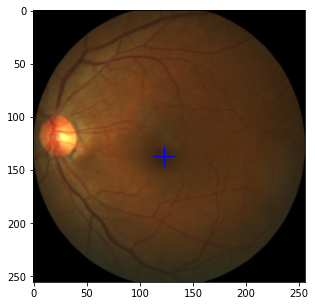

In [67]:
plt.figure(figsize=(5,5))
for img,label in val_ds:
    show(img,label)
    break

In [68]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False)

In [69]:
for img_b, label_b in train_dl:
    print(img_b.shape, img_b.dtype)
    print(label_b)
    break

torch.Size([8, 3, 256, 256]) torch.float32
[tensor([0.6245, 0.5004, 0.4377, 0.5440, 0.6785, 0.4379, 0.6736, 0.5435],
       dtype=torch.float64), tensor([0.6332, 0.5340, 0.5255, 0.5050, 0.6524, 0.4708, 0.5233, 0.5561],
       dtype=torch.float64)]


In [70]:
import torch

# extract a batch from training data
for img_b, label_b in train_dl:
    print(img_b.shape,img_b.dtype)
    
    # convert list to tensor
    label_b = torch.stack(label_b, 1)
    label_b = label_b.type(torch.float32)
    print(label_b.shape, label_b.dtype)
    break

torch.Size([8, 3, 256, 256]) torch.float32
torch.Size([8, 2]) torch.float32


In [71]:
for img_b, label_b in val_dl:
    print(img_b.shape, img_b.dtype)
    
    # convert to tensor
    label_b = torch.stack(label_b,1)
    label_b = label_b.type(torch.float32)
    print(label_b.shape,label_b.dtype)
    break

torch.Size([16, 3, 256, 256]) torch.float32
torch.Size([16, 2]) torch.float32


In [72]:
import torch.nn as nn
import torch.nn.functional as F

In [73]:
class Net(nn.Module):
    def __init__(self, params):
        super(Net, self).__init__()
    def forward(self, x):
        return x

In [74]:
def __init__(self, params):
    super(Net, self).__init__()

    C_in,H_in,W_in=params["input_shape"]
    init_f=params["initial_filters"] 
    num_outputs=params["num_outputs"] 

    self.conv1 = nn.Conv2d(C_in, init_f, kernel_size=3,stride=2,padding=1)
    self.conv2 = nn.Conv2d(init_f+C_in, 2*init_f, kernel_size=3,stride=1,padding=1)
    self.conv3 = nn.Conv2d(3*init_f+C_in, 4*init_f, kernel_size=3,padding=1)
    self.conv4 = nn.Conv2d(7*init_f+C_in, 8*init_f, kernel_size=3,padding=1)
    self.conv5 = nn.Conv2d(15*init_f+C_in, 16*init_f, kernel_size=3,padding=1)
    self.fc1 = nn.Linear(16*init_f, num_outputs)

In [75]:
def forward(self, x):
    identity=F.avg_pool2d(x,4,4)
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    identity=F.avg_pool2d(x,2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    identity=F.avg_pool2d(x,2,2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)
    
    identity=F.avg_pool2d(x,2,2)
    x = F.relu(self.conv4(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    x = F.relu(self.conv5(x))

    x=F.adaptive_avg_pool2d(x,1)
    x = x.reshape(x.size(0), -1)

    x = self.fc1(x)
    return x

In [76]:
Net.__init__=__init__
Net.forward=forward

In [77]:
params_model={
    "input_shape": (3,256,256),
    "initial_filters": 16,
    "num_outputs": 2,
}

model = Net(params_model)

In [101]:
#if torch.cuda.is_available():
#    device = torch.device("cuda")
#    model=model.to(device)
    
device  =  'cuda' if torch.cuda.is_available() else 'cpu'

In [102]:
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(19, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(51, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(115, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(243, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=256, out_features=2, bias=True)
)


In [103]:
loss_func = nn.SmoothL1Loss(reduction="sum")

In [104]:
n,c=8,2
y = 0.5 * torch.ones(n, c, requires_grad=True)
print(y.shape)

target = torch.zeros(n, c, requires_grad=False)
print(target.shape)

loss = loss_func(y, target)
print(loss.item())

y = 2 * torch.ones(n, c, requires_grad=True)
target = torch.zeros(n, c, requires_grad=False)
loss = loss_func(y, target)
print(loss.item())

torch.Size([8, 2])
torch.Size([8, 2])
2.0
24.0


In [105]:
from torch import optim
opt = optim.Adam(model.parameters(), lr=3e-4)

In [106]:
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']
    
current_lr = get_lr(opt)
print('current lr = {}'.format(current_lr))

current lr = 0.0003


In [107]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20, verbose=1)

In [108]:
for i in range(100):
    lr_scheduler.step(1)

Epoch    22: reducing learning rate of group 0 to 1.5000e-04.
Epoch    43: reducing learning rate of group 0 to 7.5000e-05.
Epoch    64: reducing learning rate of group 0 to 3.7500e-05.
Epoch    85: reducing learning rate of group 0 to 1.8750e-05.


In [109]:
def cxcy2bbox(cxcy, w=50./256,h=50./256):
    w_tensor = torch.ones(cxcy.shape[0],1,device=cxcy.device)*w
    h_tensor = torch.ones(cxcy.shape[0],1,device=cxcy.device)*h
    cx=cxcy[:,0].unsqueeze(1)
    cy=cxcy[:,1].unsqueeze(1)
    boxes=torch.cat((cx,cy, w_tensor, h_tensor), -1) # cx, cy, w, h
    return torch.cat((boxes[:, :2] - boxes[:, 2:]/2, # xmin, ymin
                     boxes[:, :2] + boxes[:, 2:]/2), 1) # xmax, ymax

In [110]:
torch.manual_seed(0)

cxcy=torch.rand(1,2)
print("center:", cxcy*256)

bb=cxcy2bbox(cxcy)
print("bounding box", bb*256)

center: tensor([[127.0417, 196.6648]])
bounding box tensor([[102.0417, 171.6648, 152.0417, 221.6648]])


In [111]:
import torchvision
def metrics_batch(output, target):
    output=cxcy2bbox(output)
    target=cxcy2bbox(target)
    iou=torchvision.ops.box_iou(output, target)
    return torch.diagonal(iou, 0).sum().item()

In [112]:
n,c = 8,2
target = torch.rand(n, c, device=device)
target = cxcy2bbox(target)
metrics_batch(target, target)

8.0

In [113]:
def loss_batch(loss_func, output, target, opt=None):
    loss = loss_func(output, target)
    with torch.no_grad():
        metric_b = metrics_batch(output, target)
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
    
    return loss.item(), metric_b

In [114]:
for xb, label_b in train_dl:
    label_b = torch.stack(label_b, 1)
    label_b = label_b.type(torch.float32)
    label_b = label_b.to(device)
    
    l,m = loss_batch(loss_func, label_b, label_b)
    print(l,m)
    break

0.0 8.0


In [115]:
def loss_epoch(model,loss_func,dataset_dl,sanity_check=False,opt=None):
    running_loss=0.0
    running_metric=0.0
    len_data=len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        # convert to tensor
        yb=torch.stack(yb,1)
        yb=yb.type(torch.float32).to(device)
        
        # get model output
        output=model(xb.to(device))
        
        # get loss per batch
        loss_b,metric_b=loss_batch(loss_func, output, yb, opt)
        
        # update running loss
        running_loss+=loss_b
        
        # update running metric
        if metric_b is not None:
            running_metric+=metric_b

    # average loss value
    loss=running_loss/float(len_data)
    
    # average metric value
    metric=running_metric/float(len_data)
    
    return loss, metric

In [116]:
import copy
def train_val(model, params):
    # extract parameters
    num_epochs=params["num_epochs"]
    loss_func=params["loss_func"]
    opt=params["optimizer"]
    train_dl=params["train_dl"]
    val_dl=params["val_dl"]
    sanity_check=params["sanity_check"]
    lr_scheduler=params["lr_scheduler"]
    path2weights=params["path2weights"]
    
    # history of loss values in each epoch
    loss_history={
        "train": [],
        "val": [],
    }
    
    # histroy of metric values in each epoch
    metric_history={
        "train": [],
        "val": [],
    }    
    
    
    # a deep copy of weights for the best performing model
    best_model_wts = copy.deepcopy(model.state_dict())
    
    # initialize best loss to a large value
    best_loss=float('inf')    
    
    for epoch in range(num_epochs):
        # get current learning rate
        current_lr=get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs - 1, current_lr))   

        # train the model
        model.train()
        train_loss, train_metric=loss_epoch(model,loss_func,train_dl,sanity_check,opt)

        # collect loss and metric for training dataset
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)
        
        # evaluate the model
        model.eval()
        with torch.no_grad():
            val_loss, val_metric=loss_epoch(model,loss_func,val_dl,sanity_check)   
        # collect loss and metric for validation dataset
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)   
        
        
        # store best model
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            
            # store weights into a local file
            torch.save(model.state_dict(), path2weights)
            print("Copied best model weights!")
            
        # learning rate schedule
        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            print("Loading best model weights!")
            model.load_state_dict(best_model_wts) 
            

        print("train loss: %.6f, accuracy: %.2f" %(train_loss,100*train_metric))
        print("val loss: %.6f, accuracy: %.2f" %(val_loss,100*val_metric))
        print("-"*10) 
        

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history



In [117]:
loss_func=nn.SmoothL1Loss(reduction="sum")
opt = optim.Adam(model.parameters(), lr=1e-4)
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

path2models= "./models/"
if not os.path.exists(path2models):
        os.mkdir(path2models)

params_train={
    "num_epochs": 500,
    "optimizer": opt,
    "loss_func": loss_func,
    "train_dl": train_dl,
    "val_dl": val_dl,
    "sanity_check": False,
    "lr_scheduler": lr_scheduler,
    "path2weights": path2models+"my_weights_smoothl1-500e2.pt",
}

# train and validate the model
model,loss_hist,metric_hist=train_val(model,params_train)

Epoch 0/499, current lr=0.0001
Copied best model weights!
train loss: 0.086940, accuracy: 13.21
val loss: 0.024628, accuracy: 14.38
----------
Epoch 1/499, current lr=0.0001
Copied best model weights!
train loss: 0.014732, accuracy: 28.51
val loss: 0.014771, accuracy: 46.09
----------
Epoch 2/499, current lr=0.0001
Copied best model weights!
train loss: 0.011734, accuracy: 33.74
val loss: 0.012724, accuracy: 30.80
----------
Epoch 3/499, current lr=0.0001
Copied best model weights!
train loss: 0.010828, accuracy: 34.49
val loss: 0.009900, accuracy: 50.91
----------
Epoch 4/499, current lr=0.0001
Copied best model weights!
train loss: 0.008719, accuracy: 40.33
val loss: 0.009595, accuracy: 62.36
----------
Epoch 5/499, current lr=0.0001
Copied best model weights!
train loss: 0.008422, accuracy: 37.85
val loss: 0.009377, accuracy: 58.53
----------
Epoch 6/499, current lr=0.0001
train loss: 0.006697, accuracy: 44.19
val loss: 0.009778, accuracy: 47.75
----------
Epoch 7/499, current lr=0.

train loss: 0.005051, accuracy: 49.85
val loss: 0.009587, accuracy: 57.61
----------
Epoch 68/499, current lr=2.5e-05
train loss: 0.004971, accuracy: 50.83
val loss: 0.009845, accuracy: 50.56
----------
Epoch 69/499, current lr=2.5e-05
train loss: 0.004888, accuracy: 51.01
val loss: 0.010070, accuracy: 52.66
----------
Epoch 70/499, current lr=2.5e-05
train loss: 0.004842, accuracy: 51.15
val loss: 0.009504, accuracy: 56.35
----------
Epoch 71/499, current lr=2.5e-05
Copied best model weights!
train loss: 0.004713, accuracy: 51.14
val loss: 0.009320, accuracy: 55.29
----------
Epoch 72/499, current lr=2.5e-05
train loss: 0.004975, accuracy: 51.93
val loss: 0.009637, accuracy: 56.81
----------
Epoch 73/499, current lr=2.5e-05
train loss: 0.004904, accuracy: 50.83
val loss: 0.010005, accuracy: 46.85
----------
Epoch 74/499, current lr=2.5e-05
train loss: 0.004933, accuracy: 49.98
val loss: 0.010057, accuracy: 49.50
----------
Epoch 75/499, current lr=2.5e-05
train loss: 0.004744, accurac

train loss: 0.005133, accuracy: 50.93
val loss: 0.009648, accuracy: 49.79
----------
Epoch 136/499, current lr=3.125e-06
train loss: 0.004787, accuracy: 51.42
val loss: 0.009390, accuracy: 57.29
----------
Epoch 137/499, current lr=3.125e-06
train loss: 0.004737, accuracy: 51.39
val loss: 0.009377, accuracy: 58.17
----------
Epoch 138/499, current lr=3.125e-06
train loss: 0.004751, accuracy: 51.85
val loss: 0.009584, accuracy: 53.06
----------
Epoch 139/499, current lr=3.125e-06
train loss: 0.004807, accuracy: 52.78
val loss: 0.009445, accuracy: 60.63
----------
Epoch 140/499, current lr=3.125e-06
train loss: 0.004859, accuracy: 52.90
val loss: 0.009460, accuracy: 60.54
----------
Epoch 141/499, current lr=3.125e-06
train loss: 0.005047, accuracy: 50.75
val loss: 0.009495, accuracy: 58.11
----------
Epoch 142/499, current lr=3.125e-06
train loss: 0.004731, accuracy: 52.83
val loss: 0.009517, accuracy: 57.24
----------
Epoch 143/499, current lr=3.125e-06
train loss: 0.004777, accuracy: 

train loss: 0.005073, accuracy: 51.42
val loss: 0.009342, accuracy: 56.20
----------
Epoch 202/499, current lr=3.90625e-07
train loss: 0.004730, accuracy: 51.67
val loss: 0.009322, accuracy: 57.19
----------
Epoch 203/499, current lr=3.90625e-07
train loss: 0.004977, accuracy: 52.37
val loss: 0.009327, accuracy: 57.33
----------
Epoch 204/499, current lr=3.90625e-07
train loss: 0.004806, accuracy: 51.91
val loss: 0.009353, accuracy: 56.60
----------
Epoch 205/499, current lr=3.90625e-07
train loss: 0.004833, accuracy: 51.80
val loss: 0.009347, accuracy: 57.06
----------
Epoch 206/499, current lr=3.90625e-07
train loss: 0.004814, accuracy: 50.77
val loss: 0.009380, accuracy: 56.55
----------
Epoch 207/499, current lr=3.90625e-07
train loss: 0.004778, accuracy: 51.83
val loss: 0.009385, accuracy: 56.78
----------
Epoch 208/499, current lr=3.90625e-07
train loss: 0.004608, accuracy: 52.01
val loss: 0.009383, accuracy: 57.18
----------
Epoch 209/499, current lr=3.90625e-07
train loss: 0.00

train loss: 0.004917, accuracy: 52.32
val loss: 0.009296, accuracy: 57.62
----------
Epoch 266/499, current lr=4.8828125e-08
train loss: 0.004854, accuracy: 51.88
val loss: 0.009307, accuracy: 57.28
----------
Epoch 267/499, current lr=4.8828125e-08
train loss: 0.004817, accuracy: 51.79
val loss: 0.009309, accuracy: 57.25
----------
Epoch 268/499, current lr=4.8828125e-08
train loss: 0.005022, accuracy: 51.27
val loss: 0.009306, accuracy: 57.38
----------
Epoch 269/499, current lr=4.8828125e-08
train loss: 0.004857, accuracy: 52.43
val loss: 0.009309, accuracy: 57.33
----------
Epoch 270/499, current lr=4.8828125e-08
train loss: 0.004869, accuracy: 52.30
val loss: 0.009310, accuracy: 57.34
----------
Epoch 271/499, current lr=4.8828125e-08
train loss: 0.004744, accuracy: 52.75
val loss: 0.009312, accuracy: 57.29
----------
Epoch 272/499, current lr=4.8828125e-08
train loss: 0.005120, accuracy: 50.87
val loss: 0.009317, accuracy: 57.17
----------
Epoch 273/499, current lr=4.8828125e-08


train loss: 0.005032, accuracy: 50.78
val loss: 0.009306, accuracy: 57.51
----------
Epoch 330/499, current lr=1.220703125e-08
train loss: 0.004736, accuracy: 51.00
val loss: 0.009306, accuracy: 57.52
----------
Epoch 331/499, current lr=1.220703125e-08
train loss: 0.004852, accuracy: 52.31
val loss: 0.009306, accuracy: 57.52
----------
Epoch 332/499, current lr=1.220703125e-08
train loss: 0.004705, accuracy: 51.53
val loss: 0.009306, accuracy: 57.51
----------
Epoch 333/499, current lr=1.220703125e-08
train loss: 0.004963, accuracy: 52.82
val loss: 0.009307, accuracy: 57.50
----------
Epoch 334/499, current lr=1.220703125e-08
train loss: 0.004774, accuracy: 50.99
val loss: 0.009307, accuracy: 57.50
----------
Epoch 335/499, current lr=1.220703125e-08
train loss: 0.004634, accuracy: 52.07
val loss: 0.009307, accuracy: 57.50
----------
Epoch 336/499, current lr=1.220703125e-08
train loss: 0.004800, accuracy: 52.18
val loss: 0.009308, accuracy: 57.48
----------
Epoch 337/499, current lr=

train loss: 0.004784, accuracy: 51.01
val loss: 0.009334, accuracy: 57.12
----------
Epoch 395/499, current lr=1.220703125e-08
train loss: 0.004641, accuracy: 52.25
val loss: 0.009333, accuracy: 57.14
----------
Epoch 396/499, current lr=1.220703125e-08
train loss: 0.004624, accuracy: 52.69
val loss: 0.009334, accuracy: 57.14
----------
Epoch 397/499, current lr=1.220703125e-08
train loss: 0.004692, accuracy: 52.76
val loss: 0.009335, accuracy: 57.11
----------
Epoch 398/499, current lr=1.220703125e-08
train loss: 0.005061, accuracy: 50.39
val loss: 0.009335, accuracy: 57.10
----------
Epoch 399/499, current lr=1.220703125e-08
train loss: 0.004819, accuracy: 51.52
val loss: 0.009334, accuracy: 57.13
----------
Epoch 400/499, current lr=1.220703125e-08
train loss: 0.004971, accuracy: 50.40
val loss: 0.009335, accuracy: 57.11
----------
Epoch 401/499, current lr=1.220703125e-08
train loss: 0.005315, accuracy: 50.60
val loss: 0.009336, accuracy: 57.09
----------
Epoch 402/499, current lr=

train loss: 0.004942, accuracy: 51.22
val loss: 0.009366, accuracy: 56.60
----------
Epoch 460/499, current lr=1.220703125e-08
train loss: 0.004596, accuracy: 52.67
val loss: 0.009366, accuracy: 56.61
----------
Epoch 461/499, current lr=1.220703125e-08
train loss: 0.004688, accuracy: 51.63
val loss: 0.009365, accuracy: 56.64
----------
Epoch 462/499, current lr=1.220703125e-08
train loss: 0.004695, accuracy: 52.40
val loss: 0.009365, accuracy: 56.68
----------
Epoch 463/499, current lr=1.220703125e-08
train loss: 0.004842, accuracy: 51.45
val loss: 0.009364, accuracy: 56.70
----------
Epoch 464/499, current lr=1.220703125e-08
train loss: 0.005029, accuracy: 50.86
val loss: 0.009366, accuracy: 56.67
----------
Epoch 465/499, current lr=1.220703125e-08
train loss: 0.004953, accuracy: 51.51
val loss: 0.009366, accuracy: 56.66
----------
Epoch 466/499, current lr=1.220703125e-08
train loss: 0.004619, accuracy: 51.01
val loss: 0.009366, accuracy: 56.68
----------
Epoch 467/499, current lr=

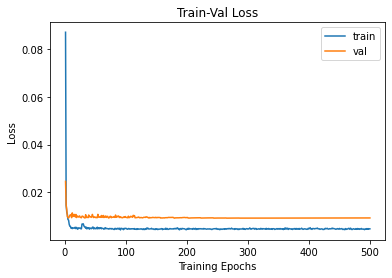

In [118]:
num_epochs = params_train["num_epochs"]
plt.title("Train-Val Loss")
plt.plot(range(1, num_epochs+1), loss_hist["train"], label="train")
plt.plot(range(1, num_epochs+1), loss_hist["val"], label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

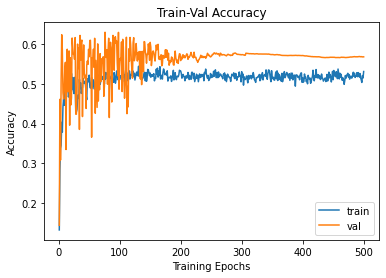

In [119]:
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1), metric_hist["val"], label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()